In [1]:
import numpy as np

x = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(x, np.array([1, 2])) + 3

In [2]:
def relu(value: float) -> float:
    return value if value > 0 else 0.


In [17]:
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid
from nn.losses import categorical_cross_entropy


nn = Sequential(InputLayer(2),
                Dense(3, activation = tanh),
                Dense(1, activation = tanh))

In [18]:
nn.weights.wl1


(1,3) : tanh

In [23]:
print(nn.weights.wl0.weights, end='\n\n')
print(nn.weights.wl0.bias, end='\n\n')

print(nn.weights.wl1.weights, end='\n\n')
print(nn.weights.wl1.bias, end='\n\n')
print(nn.weights.wl0.weights.shape, end='\n\n')
print(nn.weights.wl1.weights.shape, end='\n\n')


[[0.00562065 0.00506063]
 [0.00137963 0.00766275]
 [0.00682174 0.00948273]]

[[0.16192926 0.28183765]]

[[0.00366899 0.00708035 0.0091918 ]]

[[0.82213399 0.90346825 0.07261295]]

(3, 2)

(1, 3)



In [24]:
nn.weights.wl0.weights + nn.weights.wl0.bias

array([[0.1675499 , 0.28689827],
       [0.16330888, 0.28950039],
       [0.168751  , 0.29132037]])

In [4]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [5]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)

In [6]:
nn.forward(x[2])

ValueError: operands could not be broadcast together with shapes (3,) (1,2) 

In [ ]:

n_samples = 4
alpha = 0.01
for epoch in range(10):
    for x_i, y_i in zip(x, y):
          
        y_hat = nn.forward(x_i)
        print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        # error = categorical_cross_entropy(y_hat, y)
        error = y_hat - y_i
        print('e0: ','\n', error)
        
        dz0 = error * nn.weights.wl1.a * (1 - nn.weights.wl1.a)
        print('dw0:', dz0)
        # da1 = np.dot(nn.weights.wl1.weights.T, error)
        # dz1 = relu(da1, derivative=True)
        
        e1 = np.dot(dz0, nn.weights.wl1.weights)
        print('e1: ','\n', e1)
        dz1 = e1 * nn.weights.wl0.a * (1 - nn.weights.wl0.a)
        print('dw1:', dz1)
        # da0 = np.dot(nn.weights.wl0.weights.T, dz1)
        # dz0 = relu(da0, derivative=True)
        
        dw0 = np.dot(x_i.T, dz0)
        dw1 = np.dot(nn.weights.wl0.weights.T, dz1)
        
        nn.weights.wl0.weights -= alpha * dw0
        nn.weights.wl1.weights -= alpha * dw1
    print("Epoch {}: Error - {}".format(epoch, error))
        

 

<[0 0] | 0> -> [0.]
e0:  
 [0.]
dw0: [0.]
e1:  
 [0. 0. 0.]
dw1: [0. 0. 0.]


ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [16]:
nn.weights.wl0.a

AttributeError: 'WeightsLayer' object has no attribute 'a'

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [9]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (426, 30) | (426,)
Test shapes: (143, 30) | (143,)
Data example: 
 [1.382e+01 2.449e+01 9.233e+01 5.959e+02 1.162e-01 1.681e-01 1.357e-01
 6.759e-02 2.275e-01 7.237e-02 4.751e-01 1.528e+00 2.974e+00 3.905e+01
 9.680e-03 3.856e-02 3.476e-02 1.616e-02 2.434e-02 6.995e-03 1.601e+01
 3.294e+01 1.060e+02 7.880e+02 1.794e-01 3.966e-01 3.381e-01 1.521e-01
 3.651e-01 1.183e-01] -> 0


In [10]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
X_train = np.squeeze(x)
y_train = np.squeeze(y)

print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (4, 2) | (4,)
Data example: 
 [0 0] -> 0


In [11]:
nn = Sequential(InputLayer(2),
                Dense(3, activation=tanh),
                Dense(1, activation = tanh))

In [12]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [13]:
    
def backprob(error: np.ndarray, layer: WeightsLayer, alpha: float = 0.01):
    
   
    activation_derivative = error * layer.activation(layer.z, derivative=True)
        
    dz = np.dot(activation_derivative.T, error)
    
    
    layer.weights -= alpha * dz
    layer.bias -= alpha * error
    
    new_error = np.dot(activation_derivative, layer.weights)
    
    return new_error

In [14]:
alpha = 0.1
errors = []
wl = list(nn.weights.__dict__.values())[:-1]
n_epochs = 10
for epoch in range(n_epochs):
    errors_buffer = []
    for x_i, y_i in zip(X_train ,y_train):
        y_hat = nn.forward(x_i)
        
        print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        loss = mse(y_i, y_hat)
        
        errors_buffer.append(loss)

        error = mse_prime(y_i, y_hat)
        for weight_layer in reversed(wl):
            # print('<{}>'.format(weight_layer))
            error = backprob(error, weight_layer)
    errors.append(errors_buffer)
    print("Epoch {}: Error - {}".format(epoch, np.mean(errors_buffer)))
    
errors = np.squeeze(np.array(errors))

ValueError: operands could not be broadcast together with shapes (3,) (1,2) 

In [15]:
errors[0]

IndexError: list index out of range

In [104]:
print(y_train)
print([nn.forward(x_i).tolist() for x_i in X_train])

[0 1 1 0]
[[0.0], [0.44463924494531715], [0.44598660634535775], [0.7176751559369886]]


In [90]:
import matplotlib.pyplot as plt

In [91]:
mean_error = [np.mean(error_i) for error_i in errors]

In [92]:
mean_error

[0.6151517818804774,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038,
 0.6150234741784038]

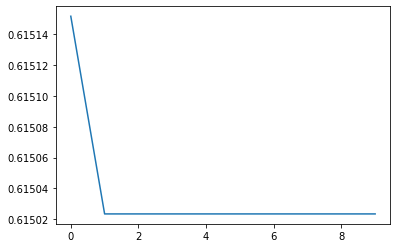

In [93]:
plt.plot(range(0, n_epochs), mean_error)

In [94]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

print(x_train[0])

[[0 0]]


In [19]:
import math
np.random.seed(0)
shape = (2, 3)
lower = -(np.sqrt(6.) / np.sqrt(shape[0] + shape[1]))
upper = np.sqrt(6.) / np.sqrt(shape[0] + shape[1])

weights = np.random.rand(*shape)
weights = lower + weights*(upper-lower)
weights



array([[ 0.10694503,  0.47145628,  0.22514328],
       [ 0.09833413, -0.16726395,  0.31963799]])

In [3]:
def foo(a):
    print('a: ->', a)
    return a+1

foo(2)

a: -> 2


3

In [18]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)


In [42]:
list(nn.weights.__dict__.values())[:-1]

[(3,2) : <function tanh at 0x00000283FF09D360>,
 (1,3) : <function tanh at 0x00000283FF09D360>]

# Classification test

In [51]:
import matplotlib.pyplot as plt
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh
from nn.losses import categorical_cross_entropy, mean_squared_error, BinaryCrossEntropy

In [52]:
from nn.losses import mean_squared_error

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [55]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (112, 4) | (112,)
Test shapes: (38, 4) | (38,)
Data example: 
 [6.7 3.1 4.7 1.5] -> 1


In [57]:
nn = Sequential(InputLayer(4),
                Dense(3, activation = relu),
                Dense(1, activation = tanh))

In [58]:

alpha = 0.01
errors = np.array([])
wl = list(nn.weights.__dict__.values())[:-1]
n = len(X_train)
for epoch in range(10):
    errors_buffer = []
    for x_i, y_i in zip(X_train[:n], y_train[:n]):
        y_hat = nn.forward(x_i)
        output_error = mean_squared_error(y_i, y_hat)
        errors_buffer.append(output_error)

        error = output_error
        for weight_layer in reversed(wl):
            # print('<{}>'.format(weight_layer))
            error = weight_layer.backward(error)
    errors = np.append(errors, errors_buffer, axis=0)
    print("Epoch {}: Error - {}".format(epoch, output_error))
    
    

Epoch 0: Error - 2.0
Epoch 1: Error - 2.0
Epoch 2: Error - 2.0
Epoch 3: Error - 2.0
Epoch 4: Error - 2.0
Epoch 5: Error - 2.0
Epoch 6: Error - 2.0
Epoch 7: Error - 2.0
Epoch 8: Error - 2.0
Epoch 9: Error - 2.0


In [60]:
y_hat = nn.forward(X_train[0])
print(y_hat, y_train[0])

def foo(y_true, y_pred):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

foo(y_train[0], y_hat)

# error_sum = 0
#     for ac, ex in zip(y_pred, y_true):
#         error_sum += (ac - ex)**2

[0.] 1


0.5

In [61]:
np.maximum(nn.weights.wl0.weights, 0.)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [62]:
y_test.reshape(1, -1)

array([[2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1]])

In [63]:
from nn.activations import apply_function_to_nparray

y_hat = np.array([])
for x_i in X_test:
    y_hat = np.append(y_hat, nn.forward(x_i))
  

print(y_hat)
y_hat = apply_function_to_nparray(y_hat, lambda value: 0 if value > 0 else 1)    


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
errors.shape

(1120,)

In [12]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_hat)
cm

array([[ 1, 11],
       [15,  3]], dtype=int64)

In [13]:
report = metrics.classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.21      0.17      0.19        18

    accuracy                           0.13        30
   macro avg       0.14      0.12      0.13        30
weighted avg       0.15      0.13      0.14        30



In [40]:
plt.plot(range(0, 70), errors[:70])

NameError: name 'plt' is not defined

## Activatioins test

In [1]:
from nn.activations import relu
from nn.losses import BinaryCrossEntropy
import numpy as np

In [2]:
a = np.array([1,-1, 2,-2, 3])
relu(a)

array([1., 0., 2., 0., 3.])

In [25]:
BinaryCrossEntropy(0, -8.11676177e-08)

nan

In [31]:
np.tanh([0.9963555249786387, -0.5288796417702989])

array([ 0.76005932, -0.48452422])

In [60]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)
  
# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]
mean_squared_error(Y_true, Y_pred)

0.21606

In [1]:
from nn.utils import set_repr

In [2]:
@set_repr("increment")
def foo(a: int):
    return a + 1 

In [3]:
foo

increment

In [4]:
def boo(a: int):
    return a - 1

boo.__repr__ = 'decrement'

In [44]:
boo

<function __main__.boo(a: int)>